In [5]:
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [3]:
from sklearn.naive_bayes import GaussianNB


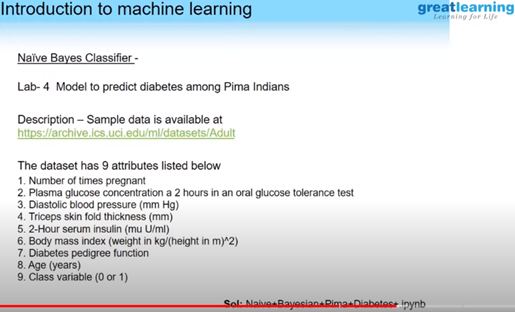

In [4]:
wine_df = pd.read_csv('F:\\sem9\\CL688_AI in Process Engineering\\2021_Learning\\Py_ML\\wine.csv', names = ["cultivator", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [9]:
# print(wine_df.to_string()) # I will now write this to another text file, means data with coulmn labels!

In [10]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [13]:
wine_df.head(10) #Let us look at the raw data. As it is evident, there are lot of missing values

,cultivator,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [14]:
wine_df.shape

(178, 14)

In [15]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
cultivator              178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


C:\Users\Ravi Lakshay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ravi Lakshay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ravi Lakshay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


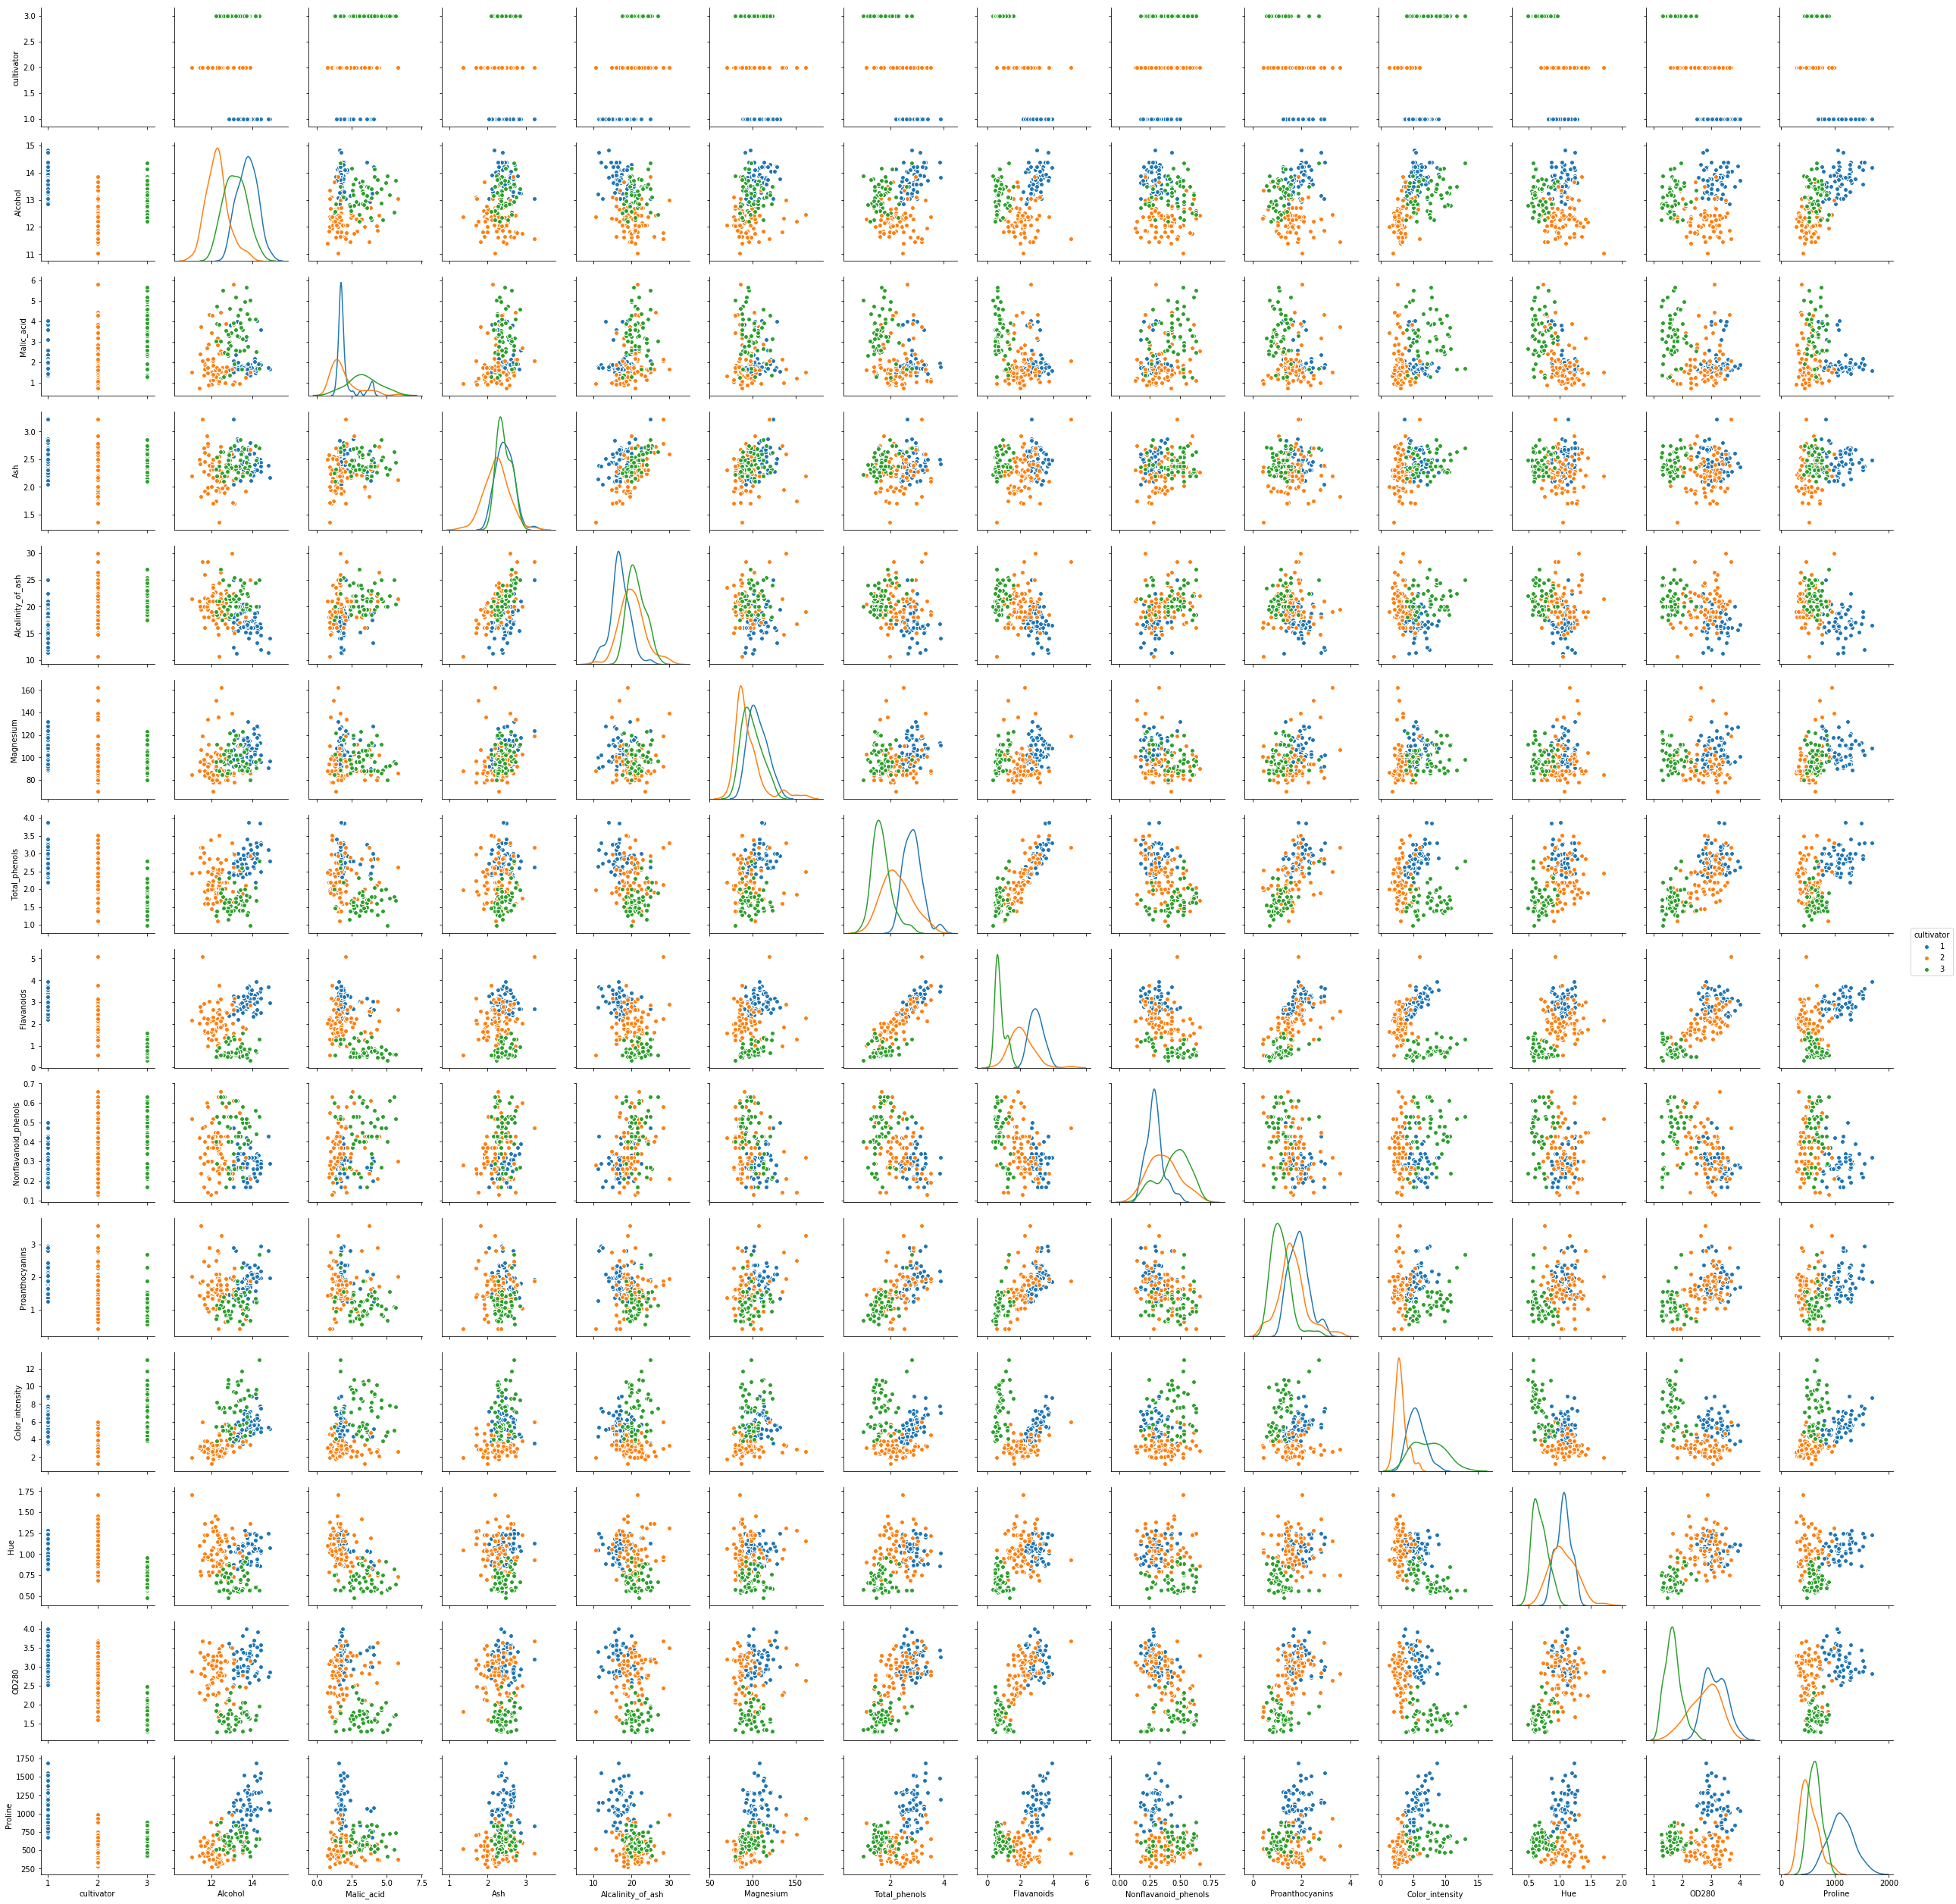

In [17]:
sns.pairplot(wine_df, diag_kind = "kde", hue = "cultivator") #One dimension \may compensate for others, and overall these weak predictors together become a strong predictors
# hue here means give me seperate colors for sep. classes

In [29]:
#splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split
x = wine_df.drop("cultivator", axis=1)
y = wine_df.pop("cultivator")

In [30]:
x.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.30, random_state=1)

In [34]:
# Invoking the NB Gaussian function to create the model
# Fitting the model in the training data set
model = GaussianNB() # This assumes that distribution on each dimension is gaussian in nature, there are also other variants!
model.fit(train_set, train_labels) # This is where out naive bayes likelyhood rations will be calcualted

GaussianNB(priors=None)

In [35]:
model.score(train_set, train_labels) # performance on test data,

0.9758064516129032

In [38]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

             precision    recall  f1-score   support

          1       0.96      1.00      0.98        23
          2       1.00      0.95      0.97        19
          3       1.00      1.00      1.00        12

avg / total       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


In [39]:
# when we build these models, we hv to look how these mdoels are likely to perform in production, stakeholders will ask me what is the performance we expect from this model in production?
# we give a 95% confidence interval that the model is accuracy range between [a,b]
# for this we use a technique called bootstrap   , in stats it is known as sampling with replacements, we also use K-Fold Cross Validations

In [40]:
# https://www.youtube.com/watch?v=Upcs6OCgnow
# Markdown in Jupyter Notebook (How to do Headings, Bold, Italic, Bullets, Insert Image, Colors etc.
# https://www.youtube.com/watch?v=uVLzL5E-YBM&ab_channel=ReuvenLerner - Using Markdown in Jupyter

# K-Fold Cross Validation --- use this technique when number of data points are less
# Take average of the score to get overall average

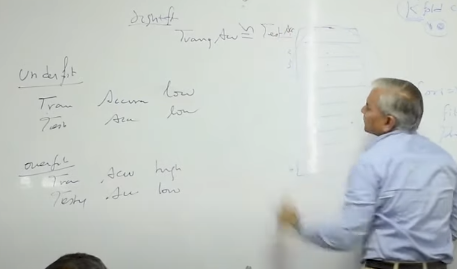


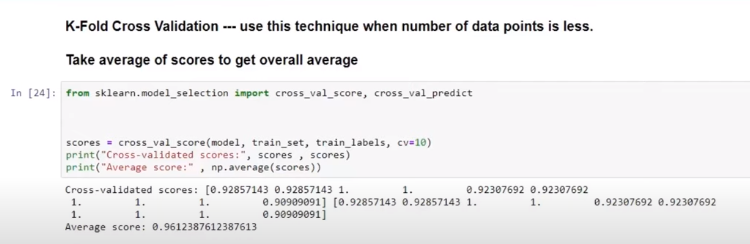

In [44]:
from sklearn.model_selection import cross_val_score,cross_val_predict

scores = cross_val_score(model, train_set, train_labels, cv=10)
print("cross-validated cores:", scores, scores)
print("Average score:", np.average(scores))

cross-validated cores: [0.92857143 0.92857143 1.         1.         0.92307692 0.92307692
 1.         1.         1.         0.90909091] [0.92857143 0.92857143 1.         1.         0.92307692 0.92307692
 1.         1.         1.         0.90909091]
Average score: 0.9612387612387613


Some more points explained in the video!- Like data leaking, cautinos with one hot coding!

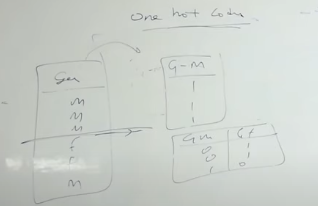   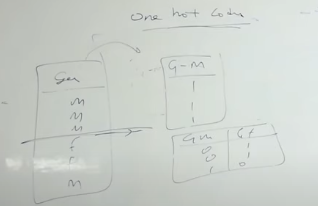



The training data and the test data may not match in terms of the attribites! as shown above.

So, whenever you are doing transformation and the transformation is done record wise, then do it first!, then break data to training and test set. Especially in one hot coding!, otherwise we may endup in run time problems!

If we are doing any transformation which involves all records put together!, like calculating std deviations, then first split it and then transform it!, otherwise the data may leak!